In [2]:
# 경고 메시지 무시
import warnings
warnings.filterwarnings(action="ignore")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font',family='Malgun Gothic')

In [4]:
# 데이터 불러오기
seoul = pd.read_excel('data/(2010-2020) weather.xlsx')
seoul

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,2010-01-01,108,-7.6,-12.7,-3.6
1,2010-01-02,108,-3.6,-7.4,0.2
2,2010-01-03,108,-6.8,-10.5,-3.2
3,2010-01-04,108,-5.9,-8.0,-3.4
4,2010-01-05,108,-9.9,-12.3,-7.0
...,...,...,...,...,...
4013,2020-12-27,108,5.8,1.4,10.0
4014,2020-12-28,108,6.7,4.2,11.4
4015,2020-12-29,108,0.1,-6.2,4.3
4016,2020-12-30,108,-10.9,-12.9,-6.2


In [5]:
seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   날짜       4018 non-null   datetime64[ns]
 1   지점       4018 non-null   int64         
 2   평균기온(℃)  4018 non-null   float64       
 3   최저기온(℃)  4018 non-null   float64       
 4   최고기온(℃)  4017 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 157.1 KB


In [6]:
# 지점 컬럼 삭제

seoul.drop('지점',axis=1,inplace=True)
seoul.head()

,날짜,평균기온(℃),최저기온(℃),최고기온(℃)
0,2010-01-01,-7.6,-12.7,-3.6
1,2010-01-02,-3.6,-7.4,0.2
2,2010-01-03,-6.8,-10.5,-3.2
3,2010-01-04,-5.9,-8.0,-3.4
4,2010-01-05,-9.9,-12.3,-7.0


In [7]:
seoul.rename(columns={"평균기온(℃)":"평균기온",\
                "최저기온(℃)":"최저기온","최고기온(℃)":"최고기온"  },inplace=True)


## seoul.columns=['날짜','평균기온','최저기온','최고기온']

In [8]:
seoul.head()

,날짜,평균기온,최저기온,최고기온
0,2010-01-01,-7.6,-12.7,-3.6
1,2010-01-02,-3.6,-7.4,0.2
2,2010-01-03,-6.8,-10.5,-3.2
3,2010-01-04,-5.9,-8.0,-3.4
4,2010-01-05,-9.9,-12.3,-7.0


In [9]:
seoul.isnull().sum()

날짜      0
평균기온    0
최저기온    0
최고기온    1
dtype: int64

In [10]:
seoul.dropna(subset=['최고기온'],axis=0,inplace=True)
seoul.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4017 entries, 0 to 4017
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      4017 non-null   datetime64[ns]
 1   평균기온    4017 non-null   float64       
 2   최저기온    4017 non-null   float64       
 3   최고기온    4017 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 156.9 KB


In [11]:
seoul.head()

,날짜,평균기온,최저기온,최고기온
0,2010-01-01,-7.6,-12.7,-3.6
1,2010-01-02,-3.6,-7.4,0.2
2,2010-01-03,-6.8,-10.5,-3.2
3,2010-01-04,-5.9,-8.0,-3.4
4,2010-01-05,-9.9,-12.3,-7.0


In [12]:
seoul["년도"] = seoul['날짜'].dt.year
seoul['월'] = seoul['날짜'].dt.month
seoul['일'] = seoul['날짜'].dt.day
seoul.head()

,날짜,평균기온,최저기온,최고기온,년도,월,일
0,2010-01-01,-7.6,-12.7,-3.6,2010,1,1
1,2010-01-02,-3.6,-7.4,0.2,2010,1,2
2,2010-01-03,-6.8,-10.5,-3.2,2010,1,3
3,2010-01-04,-5.9,-8.0,-3.4,2010,1,4
4,2010-01-05,-9.9,-12.3,-7.0,2010,1,5


In [13]:
seoul.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4017 entries, 0 to 4017
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      4017 non-null   datetime64[ns]
 1   평균기온    4017 non-null   float64       
 2   최저기온    4017 non-null   float64       
 3   최고기온    4017 non-null   float64       
 4   년도      4017 non-null   int64         
 5   월       4017 non-null   int64         
 6   일       4017 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3)
memory usage: 251.1 KB


In [14]:
seoul0815 = seoul[ (seoul['월']==8) & (seoul['일']==15)]
seoul0815

,날짜,평균기온,최저기온,최고기온,년도,월,일
226,2010-08-15,26.6,24.6,30.2,2010,8,15
591,2011-08-15,24.5,22.9,26.9,2011,8,15
957,2012-08-15,23.7,22.4,27.1,2012,8,15
1322,2013-08-15,28.7,25.8,32.4,2013,8,15
1687,2014-08-15,24.9,20.9,29.6,2014,8,15
2052,2015-08-15,27.1,23.1,30.8,2015,8,15
2418,2016-08-15,29.1,25.8,34.0,2016,8,15
2783,2017-08-15,21.9,20.8,24.0,2017,8,15
3148,2018-08-15,31.7,28.3,38.0,2018,8,15
3513,2019-08-15,25.9,23.9,28.6,2019,8,15


In [17]:
seoul0816 = seoul[(seoul['날짜'].dt.month==8) & (seoul['날짜'].dt.day==16)]
seoul0816

,날짜,평균기온,최저기온,최고기온,년도,월,일
227,2010-08-16,24.8,22.8,26.7,2010,8,16
592,2011-08-16,25.0,23.6,26.2,2011,8,16
958,2012-08-16,26.0,22.7,28.9,2012,8,16
1323,2013-08-16,28.7,26.1,31.7,2013,8,16
1688,2014-08-16,26.1,22.2,31.8,2014,8,16
2053,2015-08-16,25.8,20.7,31.2,2015,8,16
2419,2016-08-16,29.3,26.2,34.9,2016,8,16
2784,2017-08-16,23.3,20.5,26.8,2017,8,16
3149,2018-08-16,29.9,24.1,35.6,2018,8,16
3514,2019-08-16,25.9,23.0,29.5,2019,8,16


In [18]:
seoul0815.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 226 to 3879
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      11 non-null     datetime64[ns]
 1   평균기온    11 non-null     float64       
 2   최저기온    11 non-null     float64       
 3   최고기온    11 non-null     float64       
 4   년도      11 non-null     int64         
 5   월       11 non-null     int64         
 6   일       11 non-null     int64         
dtypes: datetime64[ns](1), float64(3), int64(3)
memory usage: 704.0 bytes


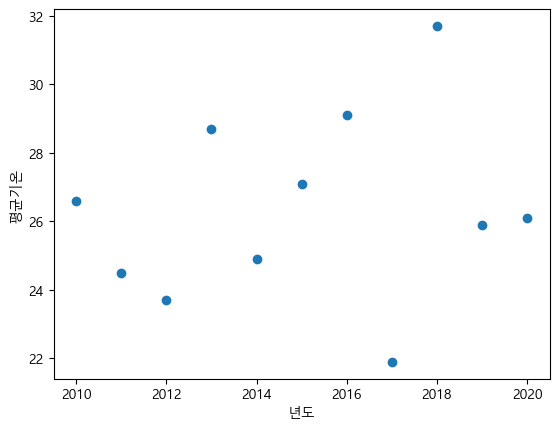

In [19]:
plt.scatter(seoul0815['년도'], seoul0815['평균기온'])
plt.xlabel('년도')
plt.ylabel('평균기온')
plt.show()

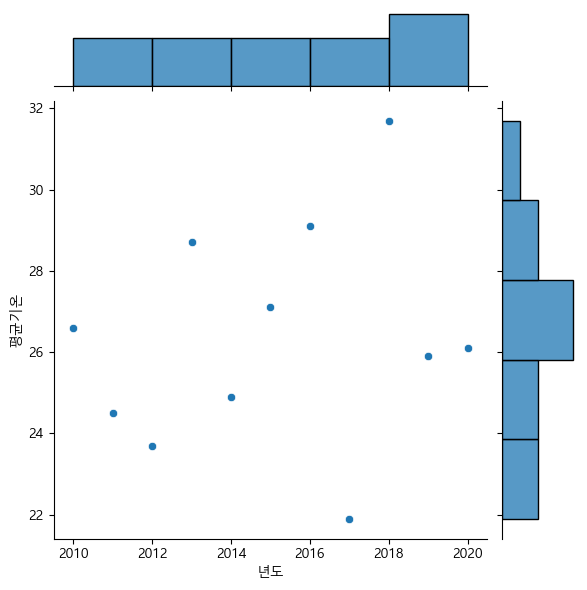

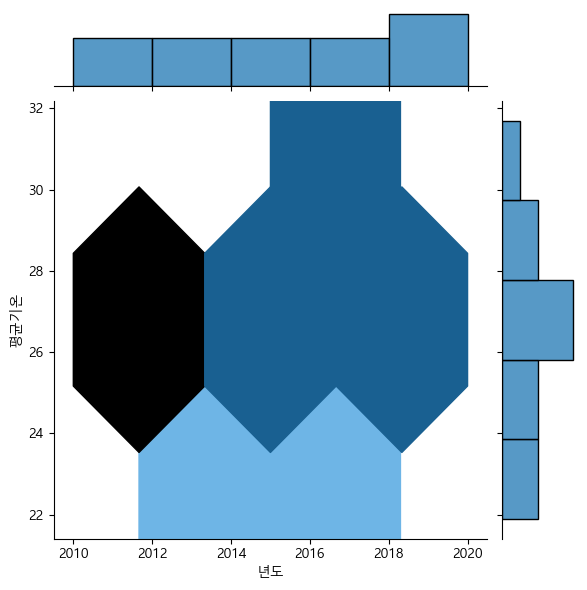

In [21]:
# jointplot 그리기
sns.jointplot(x='년도', y ='평균기온', data=seoul0815)
sns.jointplot(x='년도', y ='평균기온', kind='reg',data=seoul0815)
plt.show()

In [22]:
# 선형회귀분석 : 2024년 8월 15일 기온 예측

from sklearn.linear_model import LinearRegression 

model = LinearRegression()
model.fit(seoul0815[['년도']], seoul0815[['평균기온']]) 

LinearRegression()

In [23]:
result = model.predict([[2024]])
print(result)

[[27.83]]
